In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + '14-million-cell-phone-reviews/amazon-reviews-unlocked-mobile-phones/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [4]:
print (os.listdir(base_dir))

['Amazon_Unlocked_Mobile.csv', 'model']


In [0]:
df=pd.read_csv(base_dir+'Amazon_Unlocked_Mobile.csv')#,encoding='ISO-8859-1')

In [6]:
df


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


## PREPROCESS

In [0]:
df['Reviews'] = df['Reviews'].str.lower()

In [0]:
import string

In [0]:
# df['Reviews']all_text = ''.join([c for c in reviews if c not in punctuation])
df['Reviews']=df['Reviews'].str.replace('[{}]'.format(string.punctuation),'')

In [10]:
df['Reviews']

0         i feel so lucky to have found this used phone ...
1         nice phone nice up grade from my pantach revue...
2                                              very pleased
3         it works good but it goes slow sometimes but i...
4         great phone to replace my lost phone the only ...
                                ...                        
413835                       another great deal great price
413836                                                   ok
413837           passes every drop test onto porcelain tile
413838    i returned it because it did not meet my needs...
413839    only downside is that apparently verizon no lo...
Name: Reviews, Length: 413840, dtype: object

In [11]:
reviews=df.loc[:,'Reviews'].values
print("number of total reviews: ",len(reviews))

number of total reviews:  413840


In [0]:
df.dropna(axis=0,inplace=True)

In [0]:
reviews=df.loc[:,'Reviews'].values

In [14]:
reviews

array(['i feel so lucky to have found this used phone to us  not used hard at all phone on line from someone who upgraded and sold this one my son liked his old one that finally fell apart after 25 years and didnt want an upgrade thank you seller we really appreciate it  your honesty re said used phonei recommend this seller very highly  would but from them again',
       'nice phone nice up grade from my pantach revue very clean set up and easy set up never had an android phone but they are fantastic to say the least perfect size for surfing and social media great phone samsung',
       'very pleased', ..., 'passes every drop test onto porcelain tile',
       'i returned it because it did not meet my needs but seemed to be a good selection for others',
       'only downside is that apparently verizon no longer uses vcast music with rhapsody'],
      dtype=object)

In [15]:
print("number of revs",len(reviews))

number of revs 334335


In [0]:
all_labels=df.loc[:,'Rating'].values

In [17]:
all_labels

array([5, 4, 5, ..., 5, 3, 4])

In [0]:
labels=[]
for r in all_labels:
    if r>=3:
        labels.append(1)
    else:
        labels.append(0)

In [19]:
labels

[1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,


In [0]:
labels = np.array(labels)

In [21]:
print(len(labels))

334335


## TOKENISE

In [22]:
from collections import Counter
all_text2 = ' '.join(reviews)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)
print("total_words ",total_words)

total_words  13567628


In [23]:
print (count_words)

Counter({'the': 642994, 'i': 437212, 'it': 377781, 'and': 371459, 'phone': 356046, 'a': 335066, 'to': 324745, 'is': 258558, 'this': 199826, 'for': 174432, 'with': 142291, 'of': 141703, 'my': 140176, 'not': 136081, 'was': 130579, 'in': 127200, 'that': 121056, 'but': 116896, 'on': 109764, 'have': 94275, 'you': 92307, 'great': 83130, 'good': 80596, 'as': 79101, 'very': 75772, 'so': 72780, 'its': 68596, 'had': 57446, 'be': 53279, 'one': 52808, 'all': 51921, 'no': 51475, 'like': 49593, 'screen': 46808, 'me': 46773, 'just': 45895, 'use': 45715, 'from': 45180, 'battery': 44256, 'has': 44093, 'if': 44057, 'or': 44004, 'are': 43101, 'an': 42866, 'works': 40561, 'at': 40525, 'when': 39942, 'would': 39293, 'get': 38882, 'can': 38537, 'only': 38157, 'love': 37479, 'will': 36888, 'new': 35357, 'work': 32596, 'up': 32090, 'they': 32008, 'than': 31400, 'out': 31052, 'really': 30250, 'time': 29948, 'camera': 29942, 'price': 29601, 'about': 28969, 'phones': 28482, 'dont': 28076, 'am': 27738, 'do': 2767

In [0]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [25]:
print(vocab_to_int)

Output hidden; open in https://colab.research.google.com to view.

In [26]:
reviews_int = []
for review in reviews:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[2, 309, 26, 2058, 7, 20, 288, 9, 98, 5, 7, 234, 14, 98, 281, 46, 31, 5, 19, 649, 38, 455, 222, 918, 4, 679, 9, 30, 13, 495, 584, 485, 174, 30, 17, 547, 1200, 1374, 74, 1474, 329, 4, 130, 134, 44, 415, 332, 21, 135, 144, 60, 1594, 3, 92, 4371, 3684, 216, 98, 1146, 128, 9, 135, 25, 475, 48, 18, 38, 133, 162], [88, 5, 88, 56, 3339, 38, 13, 48051, 36438, 25, 845, 267, 56, 4, 139, 267, 56, 146, 28, 44, 109, 5, 18, 57, 43, 638, 7, 179, 1, 503, 122, 187, 10, 1865, 4, 1432, 933, 22, 5, 121], [25, 421]]


LENGTH ANALYSIS

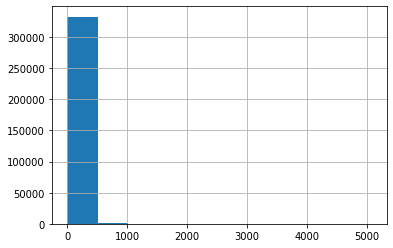

count    334335.000000
mean         40.580938
std          85.674477
min           0.000000
25%           5.000000
50%          18.000000
75%          42.000000
max        5084.000000
dtype: float64

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [0]:
# reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
# labels = [ labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

In [29]:
review_lens20 = Counter([len(x) for x in reviews_int])
print("Zero-length reviews: {}".format(review_lens20[0]))
print("Maximum review length: {}".format(max(review_lens20)))


Zero-length reviews: 73
Maximum review length: 5084


PADDING

In [0]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [0]:
seq_length = 200

features = pad_features(reviews_int, seq_length=seq_length)

In [32]:
print (features[:10,:])

[[    0     0     0 ...    38   133   162]
 [    0     0     0 ...    22     5   121]
 [    0     0     0 ...     0    25   421]
 ...
 [    0     0     0 ...    38     9   538]
 [    0     0     0 ...    13   207  1760]
 [    0     0     0 ...    34     7 69840]]


## TRAIN TEST VALIDATION SPLIT

```
# train= 80% | valid = 10% | test = 10%
```



In [33]:
split_frac = 0.8
len_feat=len(features)
len_lab=len(labels)
print("len_feat \t\t{}".format(len_feat), )
train_x = features[0:int(split_frac*len_feat)]
train_y = labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

len_feat 		334335


In [34]:
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(valid_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(267468, 200) 
Validation set: 	(33433, 200) 
Test set: 		(33434, 200)


In [35]:
print("\t\t\tLabel Shapes:")
print("Train set: \t\t{}".format(train_y.shape), 
      "\nValidation set: \t{}".format(valid_y.shape),
      "\nTest set: \t\t{}".format(test_y.shape))

			Label Shapes:
Train set: 		(267468,) 
Validation set: 	(33433,) 
Test set: 		(33434,)


## Dataloaders and Batching

In [0]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 100
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [37]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([100, 200])
Sample input: 
 tensor([[  0,   0,   0,  ...,  10,   1,  63],
        [  0,   0,   0,  ...,  27,  26,  23],
        [  0,   0,   0,  ...,  13,  54,  89],
        ...,
        [  0,   0,   0,  ...,   2,  52,   3],
        [  0,   0,   0,  ..., 349, 332,  21],
        [  0,   0,   0,  ...,   0,   0,  52]])

Sample label size:  torch.Size([100])
Sample label: 
 tensor([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 1])


# DEFINE THE MODEL
The layers are as follows:
0. Tokenize : This is not a layer for LSTM network but a mandatory step of converting our words into tokens (integers)
1. Embedding Layer: that converts our word tokens (integers) into embedding of specific size
2. LSTM Layer: defined by hidden state dims and number of layers
3. Fully Connected Layer: that maps output of LSTM layer to a desired output size
4. Sigmoid Activation Layer: that turns all output values in a value between 0 and 1
5. Output: Sigmoid output from the last timestep is considered as the final output of this network

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        # print("init1")
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True,)
        
        # dropout layer
        self.dropout = nn.Dropout(drop_prob)
        
        # linear and softmax layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        #softmax layer
        # self.sof = nn.LogSoftmax(dim=1)
        # print("init2")
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        # print("forward1")
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # softmax function
        # soft_out = self.sof(out)
        # reshape to be batch_size first
        # soft_out = soft_out.view(batch_size, -1)
        # soft_out = soft_out[:, -1] # get last batch of labels
        
        # print("forward2")
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            # print("yo1")
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
            # print("yo2")
        else:
            # print("lo1")
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
            # print("lo2")
        
        return hidden

In [40]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 300
hidden_dim = 512
n_layers = 3
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(117715, 300)
  (lstm): LSTM(300, 512, num_layers=3, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (sig): Sigmoid()
)


# TRAIN

In [41]:
# loss and optimization functions
lr=0.003

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 5 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 1000
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net = net.to(device)

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.to(device), labels.to(device)

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        # inputs = inputs.type(torch.LongTensor)
        # print("Train")
        if( (inputs.shape[0],inputs.shape[1]) != (batch_size,seq_length)):
          print("Validation - Input Shape Issue:",inputs.shape)
          continue
        output, h = net(inputs, h)
        # print("Train")

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step( )

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.to(device), labels.to(device)

                # inputs = inputs.type(torch.LongTensor)
                # if(train_on_gpu):
                #     inputs = inputs.to(device)
                # print("valid")
                if( (inputs.shape[0],inputs.shape[1]) != (batch_size,seq_length)):
                  print("Validation - Input Shape Issue:",inputs.shape)
                  continue
                output, val_h = net(inputs, val_h)
                # print("valid")
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))


Epoch: 1/5... Step: 1000... Loss: 0.264050... Val Loss: 0.189909
Epoch: 1/5... Step: 2000... Loss: 0.234491... Val Loss: 0.170934
Epoch: 2/5... Step: 3000... Loss: 0.194845... Val Loss: 0.182316
Epoch: 2/5... Step: 4000... Loss: 0.075128... Val Loss: 0.190746
Epoch: 2/5... Step: 5000... Loss: 0.114280... Val Loss: 0.184301
Epoch: 3/5... Step: 6000... Loss: 0.032694... Val Loss: 0.209102
Epoch: 3/5... Step: 7000... Loss: 0.110523... Val Loss: 0.190146
Epoch: 3/5... Step: 8000... Loss: 0.087199... Val Loss: 0.191447
Epoch: 4/5... Step: 9000... Loss: 0.115971... Val Loss: 0.207059
Epoch: 4/5... Step: 10000... Loss: 0.036435... Val Loss: 0.219739
Epoch: 5/5... Step: 11000... Loss: 0.082502... Val Loss: 0.215526
Epoch: 5/5... Step: 12000... Loss: 0.079052... Val Loss: 0.239415
Epoch: 5/5... Step: 13000... Loss: 0.065284... Val Loss: 0.198428


In [42]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.to(device), labels.to(device)
    
    # get predicted outputs
    # inputs = inputs.type(torch.LongTensor)

    if( (inputs.shape[0],inputs.shape[1]) != (batch_size,seq_length)):
      print("Validation - Input Shape Issue:",inputs.shape)
      continue
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))


Test loss: 0.262
Test accuracy: 0.906


****** FULL DATA - softmax
Test loss: 77.461
Test accuracy: 0.225

****** 50000 revs - softmax
Test loss: 79.0
Test accuracy: 0.20.9

****** 50000 revs - sigmoid
Test loss: 0.210
Test accuracy: 0.949

****** FULL DATA - sigmoid
Test loss: 0.261
Test accuracy: 0.909

In [0]:
test_review = 'This phone had the best features. I loved it.'
seq_length=200 # good to use the length that was trained on

In [44]:
from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])

    return test_ints

test_review_t=test_review
# test code and generate tokenized review
test_ints = tokenize_review(test_review_t)
print(test_ints)


# test sequence padding
seq_length=200
features = pad_features(test_ints, seq_length)

print(features)


# test conversion to tensor and pass into your model
feature_tensor = torch.from_numpy(features)
print(feature_tensor.size())


def predict(net, test_review, sequence_length=200):
    
    net.eval()
    
    # tokenize review
    test_ints = tokenize_review(test_review)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = net(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")


[[9, 5, 28, 1, 127, 173, 2, 435, 3]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   9   5  28   1 127 173   2
  435   3]]
torch.Size([1, 200])


In [45]:

predict(net, test_review, seq_length)

Prediction value, pre-rounding: 0.999268
Positive review detected!


In [46]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in net.state_dict():
    print(param_tensor, "\t", net.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
embedding.weight 	 torch.Size([117715, 300])
lstm.weight_ih_l0 	 torch.Size([2048, 300])
lstm.weight_hh_l0 	 torch.Size([2048, 512])
lstm.bias_ih_l0 	 torch.Size([2048])
lstm.bias_hh_l0 	 torch.Size([2048])
lstm.weight_ih_l1 	 torch.Size([2048, 512])
lstm.weight_hh_l1 	 torch.Size([2048, 512])
lstm.bias_ih_l1 	 torch.Size([2048])
lstm.bias_hh_l1 	 torch.Size([2048])
lstm.weight_ih_l2 	 torch.Size([2048, 512])
lstm.weight_hh_l2 	 torch.Size([2048, 512])
lstm.bias_ih_l2 	 torch.Size([2048])
lstm.bias_hh_l2 	 torch.Size([2048])
fc.weight 	 torch.Size([1, 512])
fc.bias 	 torch.Size([1])
Optimizer's state_dict:
state 	 {140412842044440: {'step': 13370, 'exp_avg': tensor([[-1.4479e-06, -9.4578e-05,  8.6594e-05,  ..., -1.8717e-04,
         -7.6187e-05,  4.8048e-05],
        [-1.3673e-04,  1.7563e-04, -5.1662e-04,  ...,  1.2113e-04,
          3.2224e-04, -1.1455e-03],
        [ 3.6744e-04, -2.9650e-04, -4.6414e-04,  ..., -1.7080e-04,
         -1.7924e-04, -3.2636e-04],
    

In [47]:
PATH=base_dir+'modelLSTM'  
torch.save(net, PATH)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type SentimentLSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [48]:
PATH='/content/gdrive/My Drive/Customer Segmentation/'+'modelLSTM'  
torch.save(net, PATH)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type SentimentLSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
